In [10]:
import tensorflow as tf
from keras.preprocessing.image import array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import load_model

In [3]:
def get_iou_vector(A, B):
    batch_size = A.shape[0]
    metric = []
    for batch in range(batch_size):
        t, p = A[batch]>0, B[batch]>0
#         if np.count_nonzero(t) == 0 and np.count_nonzero(p) > 0:
#             metric.append(0)
#             continue
#         if np.count_nonzero(t) >= 1 and np.count_nonzero(p) == 0:
#             metric.append(0)
#             continue
#         if np.count_nonzero(t) == 0 and np.count_nonzero(p) == 0:
#             metric.append(1)
#             continue
        
        intersection = np.logical_and(t, p)
        union = np.logical_or(t, p)
        iou = (np.sum(intersection > 0) + 1e-10 )/ (np.sum(union > 0) + 1e-10)
        thresholds = np.arange(0.5, 1, 0.05)
        s = []
        for thresh in thresholds:
            s.append(iou > thresh)
        metric.append(np.mean(s))

    return np.mean(metric)

def my_iou_metric(label, pred):
    return tf.py_func(get_iou_vector, [label, pred>0.5], tf.float64)

In [6]:
# Load your own trained model
model = load_model(r"C:\Users\jksing\Documents\salt\U-net.h5", custom_objects={'my_iou_metric':my_iou_metric})
model._make_predict_function() 

W0215 15:11:57.389285  2728 deprecation.py:323] From <ipython-input-3-ac35097d9761>:28: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
W0215 15:11:57.419268  2728 deprecation.py:323] From C:\Users\jksing\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: a

In [7]:
model

In [24]:
img= load_img(r"C:\Users\jksing\Documents\salt\test_images\000a68e46c.png",grayscale=True)

C:\Users\jksing\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [25]:
image_arr = img_to_array(img)

In [26]:
import numpy as np
x = np.expand_dims(image_arr, axis=0)

In [32]:
preds = model.predict(x)

In [33]:
preds = preds.reshape(101,101,1)

In [35]:
preds.shape

(101, 101, 1)

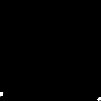

In [36]:
array_to_img(preds)